In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
!pip install ipyleaflet

In [7]:
bikes_data_2022 = pd.read_csv("dublinbike-historical-data-2022-01.csv")

bikes_data_2022.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2022-01-01 00:00:04,2021-12-31 23:57:39,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814
1,3,2022-01-01 00:00:04,2021-12-31 23:49:57,BOLTON STREET,20,19,1,OPEN,Bolton Street,53.3512,-6.26986
2,4,2022-01-01 00:00:04,2021-12-31 23:58:39,GREEK STREET,20,9,11,OPEN,Greek Street,53.3469,-6.27298
3,5,2022-01-01 00:00:04,2021-12-31 23:51:48,CHARLEMONT PLACE,40,17,23,OPEN,Charlemont Street,53.3307,-6.26018
4,6,2022-01-01 00:00:04,2021-12-31 23:59:13,CHRISTCHURCH PLACE,20,13,7,OPEN,Christchurch Place,53.3434,-6.27012


In [8]:
def count_duplicated_rows(df):
    return df.duplicated().sum()

def count_nan_values(df):
    return df.isnull().sum()

def detect_outliers(df, column_names):
    """
    Detects outliers in a specified column or columns of a dataframe using the IQR method.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    column_names (str or list of str): The name(s) of the column(s) to check for outliers.

    Returns:
    DataFrame: A dataframe containing the outliers.
    """
    # Convert column_names to a list if it is a single column name
    if isinstance(column_names, str):
        column_names = [column_names]

    outliers = pd.DataFrame()

    for column_name in column_names:
  
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        column_outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

        column_outliers['Outlier_Column'] = column_name

        outliers = outliers.append(column_outliers)

    return outliers

In [9]:
bikes_data_2022.shape

(163699, 11)

In [10]:
bikes_data_size = bikes_data_2022.size
print(f'Total number of elements in the DataFrame: {bikes_data_size}.')

Total number of elements in the DataFrame: 1800689.


In [11]:
bikes_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163699 entries, 0 to 163698
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   STATION ID             163699 non-null  int64  
 1   TIME                   163699 non-null  object 
 2   LAST UPDATED           163699 non-null  object 
 3   NAME                   163699 non-null  object 
 4   BIKE_STANDS            163699 non-null  int64  
 5   AVAILABLE_BIKE_STANDS  163699 non-null  int64  
 6   AVAILABLE_BIKES        163699 non-null  int64  
 7   STATUS                 163699 non-null  object 
 8   ADDRESS                163699 non-null  object 
 9   LATITUDE               163699 non-null  float64
 10  LONGITUDE              163699 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 13.7+ MB


In [49]:
bikes_data_2022.describe()

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,LATITUDE,LONGITUDE
count,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000
mean,60.979413,32.000128,19.200191,12.741410,53.345687,-6.264389
std,37.757380,7.670569,9.636346,7.932004,0.007647,0.018114
min,2.000000,1.000000,0.000000,0.000000,53.330100,-6.310020
25%,31.000000,29.000000,12.000000,7.000000,53.339800,-6.275230
50%,61.000000,30.000000,19.000000,12.000000,53.345900,-6.262980
75%,90.000000,40.000000,26.000000,18.000000,53.351000,-6.251560
max,507.000000,40.000000,40.000000,40.000000,53.360000,-6.230850


In [50]:
print(f"Number of duplicate rows in the bike dataset is {count_duplicated_rows(bikes_data_2022)}.")

Number of duplicate rows in the bike dataset is 0.


In [51]:
count_nan_values(bikes_data_2022)

STATION ID               0
TIME                     0
LAST UPDATED             0
NAME                     0
BIKE_STANDS              0
AVAILABLE_BIKE_STANDS    0
AVAILABLE_BIKES          0
STATUS                   0
ADDRESS                  0
LATITUDE                 0
LONGITUDE                0
dtype: int64

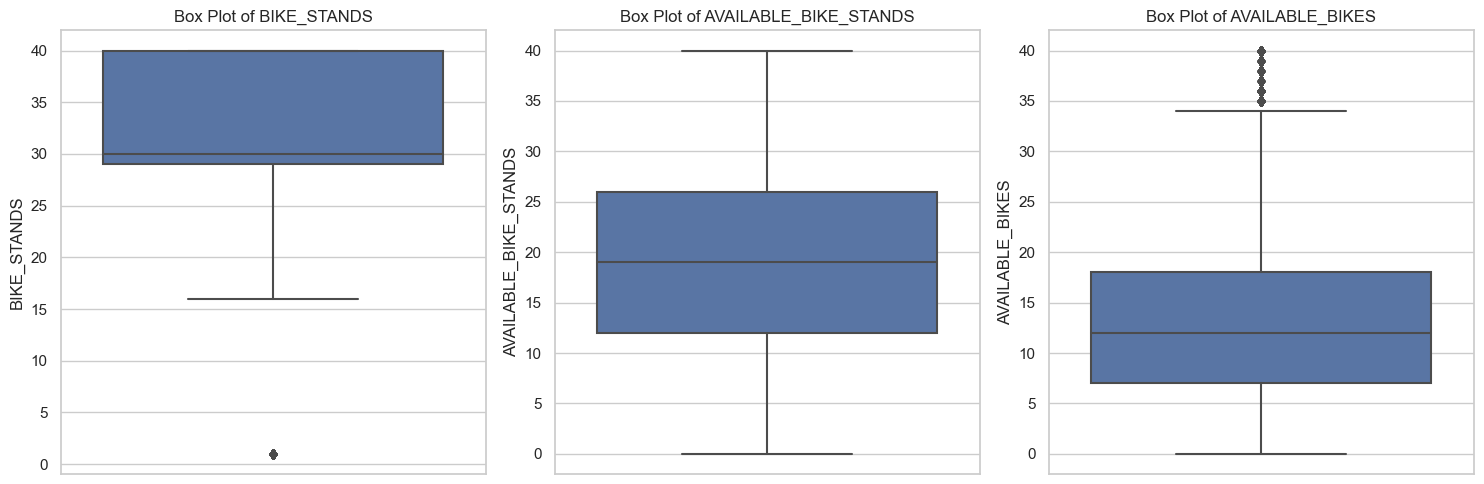

In [14]:
# Setting the style for the plots
sns.set(style="whitegrid")

# Plotting box plots for the columns of interest
plt.figure(figsize=(15, 5))

# BIKE_STANDS
plt.subplot(1, 3, 1)
sns.boxplot(y=bikes_data_2022['BIKE_STANDS'])
plt.title('Box Plot of BIKE_STANDS')

# AVAILABLE_BIKE_STANDS
plt.subplot(1, 3, 2)
sns.boxplot(y=bikes_data_2022['AVAILABLE_BIKE_STANDS'])
plt.title('Box Plot of AVAILABLE_BIKE_STANDS')

# AVAILABLE_BIKES
plt.subplot(1, 3, 3)
sns.boxplot(y=bikes_data_2022['AVAILABLE_BIKES'])
plt.title('Box Plot of AVAILABLE_BIKES')

plt.tight_layout()
plt.show()

Bike Stands - This plot shows a relatively consistent distribution without apparent outliers. The data points seem to be clustered around certain values, likely indicating standard sizes for bike stations.

AVAILABLE_BIKE_STANDS and AVAILABLE_BIKES: Both these plots show a wide distribution of values, which is expected as the number of available stands and bikes would vary throughout the day. There don't appear to be extreme outliers in these plots, but this doesn't rule out the possibility of less obvious outliers.

In [19]:
outlier_data = detect_outliers(bikes_data_2022, ['BIKE_STANDS', 'AVAILABLE_BIKE_STANDS', 'AVAILABLE_BIKES'])
outlier_data.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,Outlier_Column
110,507,2022-01-01 00:00:04,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,OPEN,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,BIKE_STANDS
221,507,2022-01-01 00:30:03,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,OPEN,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,BIKE_STANDS
332,507,2022-01-01 01:00:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,OPEN,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,BIKE_STANDS
443,507,2022-01-01 01:30:03,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,OPEN,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,BIKE_STANDS
554,507,2022-01-01 02:00:04,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,OPEN,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.3546,-6.24262,BIKE_STANDS


The statistical analysis using the IQR method reveals that there are 1,292 rows in the dataset considered as outliers, constituting approximately 0.79% of the data. This is a relatively small percentage, which indicates that most of the data conforms to a consistent pattern.

Since outliers are a very small percentage of the whole dataset(0.79%), those will be excluded so that the analysis can focus more on the typical, everyday behavior of the bike-sharing system, which might be more relevant to understanding general usage patterns.

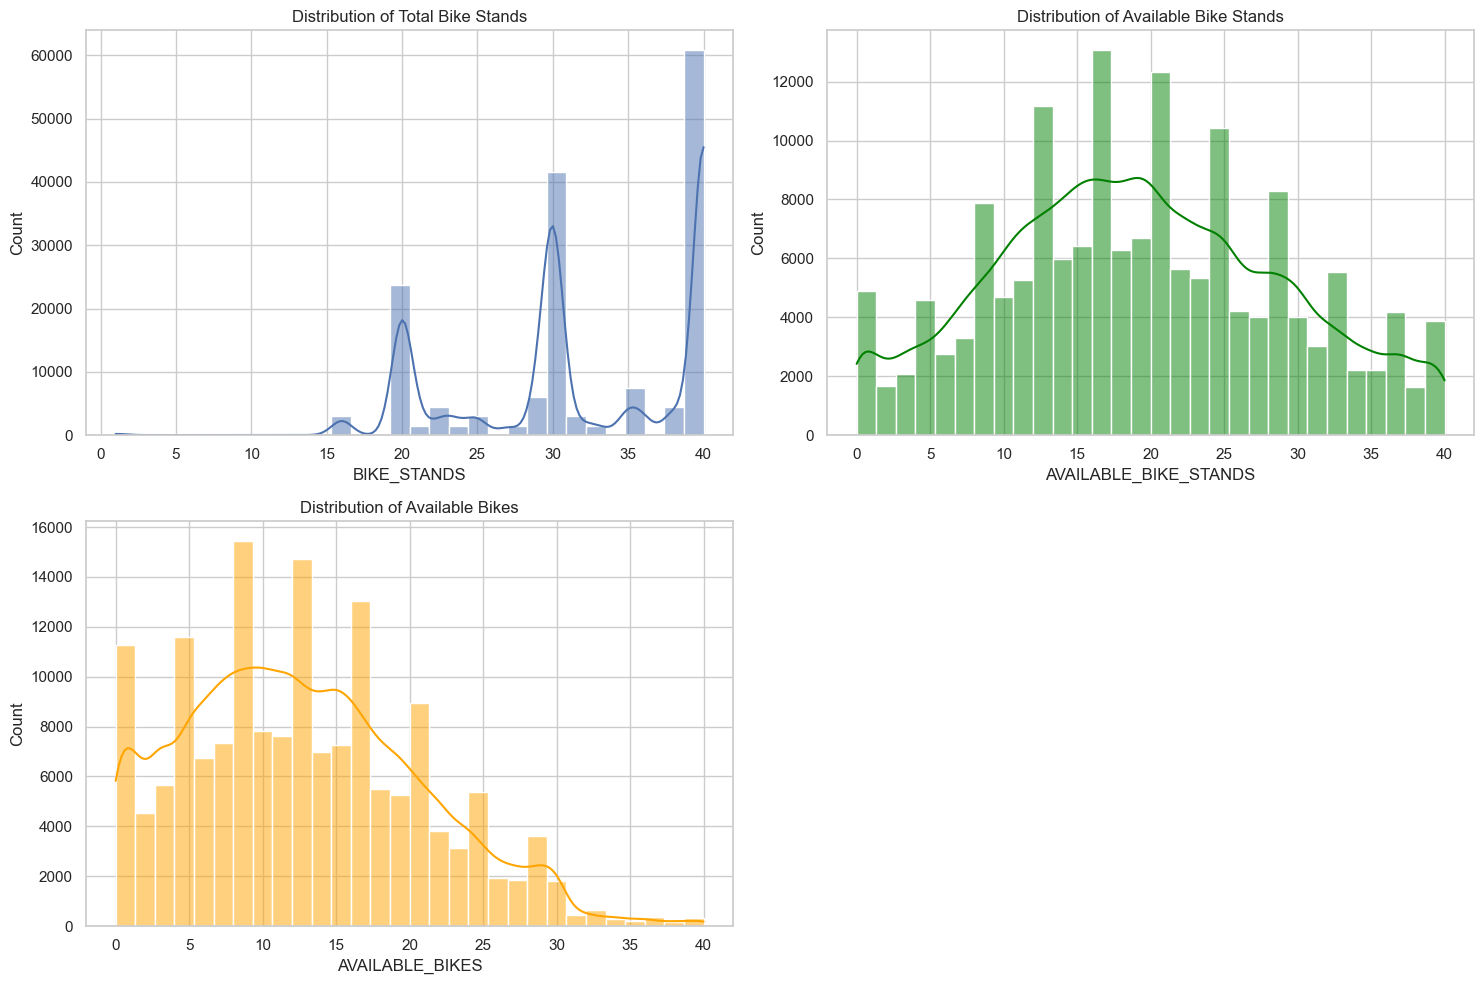

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

# Bike Stands
plt.subplot(2, 2, 1)
sns.histplot(bikes_data_2022['BIKE_STANDS'], kde=True, bins=30)
plt.title('Distribution of Total Bike Stands')

# Available Bike Stands
plt.subplot(2, 2, 2)
sns.histplot(bikes_data_2022['AVAILABLE_BIKE_STANDS'], kde=True, bins=30, color='green')
plt.title('Distribution of Available Bike Stands')

# Available Bikes
plt.subplot(2, 2, 3)
sns.histplot(bikes_data_2022['AVAILABLE_BIKES'], kde=True, bins=30, color='orange')
plt.title('Distribution of Available Bikes')

plt.tight_layout()
plt.show()

Total Bike Stands: The distribution shows peaks at specific values (e.g., 20, 30, 40), suggesting standard capacities at many stations.

Available Bike Stands: This distribution is more spread out, indicating variability in the number of available stands at different times or stations.

Available Bikes: Similar to available stands, the distribution of available bikes is also varied, reflecting differing usage patterns across stations and times.

Creating a new dataset to simplify it, as creating the interactive visualization with the whole datasetresults in a very long loading time and interruption of the notebook. The only data needed for the geographic visualization is the Name of the Station, the Latitude and Longitude. 

In [22]:
data_for_station_viz = bikes_data_2022[['NAME', 'LATITUDE', 'LONGITUDE']].drop_duplicates()

data_for_station_viz

,NAME,LATITUDE,LONGITUDE
0,BLESSINGTON STREET,53.3568,-6.26814
1,BOLTON STREET,53.3512,-6.26986
2,GREEK STREET,53.3469,-6.27298
3,CHARLEMONT PLACE,53.3307,-6.26018
4,CHRISTCHURCH PLACE,53.3434,-6.27012
...,...,...,...
106,WILTON TERRACE (PARK),53.3337,-6.24834
107,KILLARNEY STREET,53.3548,-6.24758
108,BROADSTONE,53.3547,-6.27231
109,HANOVER QUAY EAST,53.3437,-6.23175


In [41]:
dublin_map = folium.Map(location=[53.3498, -6.2603], zoom_start=13)

for index, row in data_for_station_viz.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['NAME']  
    ).add_to(dublin_map)

dublin_map
